In [308]:
# Calling pandas and numpy
import pandas as pd
import numpy as np


# Calling visualizations libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
import sklearn.metrics as metrics

import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.ensemble import IsolationForest


In [309]:
train_data = pd.read_csv('https://raw.githubusercontent.com/bobby6007/airline_passenger_satissfaction/main/train_dataset.csv',index_col='id')
test_data = pd.read_csv('https://raw.githubusercontent.com/bobby6007/airline_passenger_satissfaction/main/test_dataset.csv',index_col='id')

In [310]:
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [311]:
test_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,3,...,5,2,4,4,3,5,1,5,152,191.0
2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,3,...,1,5,4,4,1,3,3,5,0,0.0
5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,3,...,5,5,4,5,4,5,5,5,130,140.0


In [312]:
test_data.shape

(4000, 22)

In [313]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4000 non-null   object 
 1   Customer Type                      4000 non-null   object 
 2   Age                                4000 non-null   int64  
 3   Type of Travel                     4000 non-null   object 
 4   Class                              4000 non-null   object 
 5   Flight Distance                    4000 non-null   int64  
 6   Inflight wifi service              4000 non-null   int64  
 7   Departure/Arrival time convenient  4000 non-null   int64  
 8   Ease of Online booking             4000 non-null   int64  
 9   Gate location                      4000 non-null   int64  
 10  Food and drink                     4000 non-null   int64  
 11  Online boarding                    4000 non-null   int64

In [314]:
train_data.shape

(10000, 23)

In [315]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int

In [316]:
mean = train_data['Arrival Delay in Minutes'].mean()
train_data['Arrival Delay in Minutes']=train_data["Arrival Delay in Minutes"].fillna(mean)

In [317]:
train_data['Gender'].value_counts()

Female    5169
Male      4831
Name: Gender, dtype: int64

In [318]:
train_data['Gender']=train_data['Gender'].map({'Female':0,'Male':1})


In [319]:
train_data['Customer Type'].value_counts()


Loyal Customer       8307
disloyal Customer    1693
Name: Customer Type, dtype: int64

In [320]:
train_data['Customer Type']=train_data['Customer Type'].map({'Loyal Customer':1,'disloyal Customer':0})


In [321]:
train_data['Type of Travel'].value_counts()

Business travel    7079
Personal Travel    2921
Name: Type of Travel, dtype: int64

In [322]:
train_data['Type of Travel']=train_data['Type of Travel'].map({'Business travel':0,'Personal Travel':1})


In [323]:
train_data['Class'].value_counts()

Business    5048
Eco         4251
Eco Plus     701
Name: Class, dtype: int64

In [324]:
train_data['Class']=train_data['Class'].map({'Business':1,'Eco Plus':2,'Eco':3})


In [325]:
train_data['Inflight wifi service'].value_counts()

3    2378
2    2375
4    2032
1    1625
5    1233
0     357
Name: Inflight wifi service, dtype: int64

In [326]:
train_data['Departure/Arrival time convenient'].value_counts()

4    2434
5    2177
3    1772
2    1621
1    1472
0     524
Name: Departure/Arrival time convenient, dtype: int64

In [327]:
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,33,0,3,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,0,1,49,0,1,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,0,1,43,0,3,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,0,1,27,0,1,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,1,1,11,1,3,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [328]:
train_data.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.483100,0.830700,39.375100,0.292100,1.920300,1229.556200,2.780200,3.065100,2.797800,2.981000,...,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,0.499739,0.375035,14.897959,0.454751,0.961062,1022.281958,1.362745,1.527316,1.421168,1.283278,...,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,39.990245,0.500025
min,0.000000,0.000000,7.000000,0.000000,1.000000,31.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,27.000000,0.000000,1.000000,421.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,40.000000,0.000000,1.000000,863.500000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,1.000000,1.000000,51.000000,1.000000,3.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,1.000000,80.000000,1.000000,3.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


In [329]:
train_data.corrwith(train_data['satisfaction']).abs().sort_values(ascending=False)

satisfaction                         1.000000
Class                                0.518931
Online boarding                      0.504986
Type of Travel                       0.482266
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Customer Type                        0.181592
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048582
Departure Delay in Minutes           0.042960
Gate location                     

In [330]:
corr_matrix = train_data.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,1.000000,0.025020,0.004407,0.021504,0.001256,0.017786,0.010111,0.016445,0.007580,0.017967,0.004991,0.045786,0.045933,0.009528,0.004277,0.019076,0.039071,0.019710,0.048099,0.008535,0.032548,0.027392,0.002601
Customer Type,0.025020,1.000000,0.291192,0.280023,0.123456,0.226549,0.003499,0.196112,0.018328,0.000866,0.072036,0.195554,0.174279,0.126166,0.061039,0.071066,0.014837,0.032102,0.026231,0.101625,0.008944,0.006908,0.181592
Age,0.004407,0.291192,1.000000,0.075133,0.163603,0.110823,0.020904,0.036071,0.026964,0.012077,0.021971,0.215613,0.169291,0.097421,0.073412,0.060124,0.040368,0.038761,0.036921,0.062409,0.015618,0.019043,0.144302
Type of Travel,0.021504,0.280023,0.075133,1.000000,0.557850,0.276756,0.099728,0.243037,0.114107,0.035903,0.077951,0.241535,0.150680,0.186244,0.080640,0.153127,0.035709,0.006062,0.038847,0.110651,0.007013,0.007049,0.482266
Class,0.001256,0.123456,0.163603,0.557850,1.000000,0.453539,0.025290,0.091019,0.089416,0.007877,0.095619,0.336912,0.245338,0.226036,0.224167,0.221653,0.179048,0.165677,0.158066,0.153413,0.001794,0.005106,0.518931
Flight Distance,0.017786,0.226549,0.110823,0.276756,0.453539,1.000000,0.002341,0.021320,0.052807,0.017513,0.065939,0.213859,0.170203,0.150573,0.115167,0.140509,0.073161,0.066881,0.058939,0.100705,0.011425,0.002897,0.298703
Inflight wifi service,0.010111,0.003499,0.020904,0.099728,0.025290,0.002341,1.000000,0.362355,0.730731,0.362702,0.119807,0.438034,0.107020,0.198351,0.133511,0.172526,0.123695,0.039923,0.113467,0.119484,0.019843,0.023061,0.277395
Departure/Arrival time convenient,0.016445,0.196112,0.036071,0.243037,0.091019,0.021320,0.362355,1.000000,0.456498,0.479002,0.001982,0.046456,0.002102,0.007094,0.071368,0.027487,0.072969,0.078166,0.062814,0.001172,0.010846,0.008973,0.067638
Ease of Online booking,0.007580,0.018328,0.026964,0.114107,0.089416,0.052807,0.730731,0.456498,1.000000,0.476405,0.017193,0.388220,0.016831,0.043574,0.053613,0.116333,0.044259,0.013875,0.032168,0.007301,0.001474,0.003711,0.164662
Gate location,0.017967,0.000866,0.012077,0.035903,0.007877,0.017513,0.362702,0.479002,0.476405,1.000000,0.002645,0.003610,0.008359,0.001144,0.015083,0.008752,0.000493,0.037372,0.003065,0.015090,0.001907,0.000683,0.007169


Preparing test data for ML

In [331]:
# filling Nan values 
mean = test_data['Arrival Delay in Minutes'].mean()
test_data['Arrival Delay in Minutes']=test_data["Arrival Delay in Minutes"].fillna(mean)


# transfering categorical values into numerical
test_data['Gender']=test_data['Gender'].map({'Female':0,'Male':1})
test_data['Customer Type']=test_data['Customer Type'].map({'Loyal Customer':1,'disloyal Customer':0})
test_data['Type of Travel']=test_data['Type of Travel'].map({'Business travel':0,'Personal Travel':1})
test_data['Class']=test_data['Class'].map({'Business':1,'Eco Plus':2,'Eco':3})
# Analyzing and fixing outliers
Q1 = test_data.quantile(0.25)
Q3 = test_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
test_data = test_data[~((test_data < (Q1 - 1.5 * IQR)) |(test_data > (Q3 + 1.5 * IQR))).any(axis=1)]

X_sample = test_data
# Scaling
from sklearn import preprocessing
r_scaler = preprocessing.StandardScaler()
r_scaler.fit(X_sample)
modified_data = pd.DataFrame(r_scaler.transform(X_sample), columns=X_sample.columns)


Gender                                  1.00
Customer Type                           0.00
Age                                    24.00
Type of Travel                          1.00
Class                                   2.00
Flight Distance                      1333.25
Inflight wifi service                   2.00
Departure/Arrival time convenient       2.00
Ease of Online booking                  2.00
Gate location                           2.00
Food and drink                          2.00
Online boarding                         2.00
Seat comfort                            2.00
Inflight entertainment                  3.00
On-board service                        1.00
Leg room service                        3.00
Baggage handling                        2.00
Checkin service                         1.00
Inflight service                        2.00
Cleanliness                             2.00
Departure Delay in Minutes             12.00
Arrival Delay in Minutes               13.00
dtype: flo

In [332]:
Q1 = train_data.quantile(0.25)
Q3 = train_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                                  1.00
Customer Type                           0.00
Age                                    24.00
Type of Travel                          1.00
Class                                   2.00
Flight Distance                      1385.75
Inflight wifi service                   2.00
Departure/Arrival time convenient       2.00
Ease of Online booking                  2.00
Gate location                           2.00
Food and drink                          2.00
Online boarding                         2.00
Seat comfort                            2.00
Inflight entertainment                  3.00
On-board service                        1.00
Leg room service                        3.00
Baggage handling                        2.00
Checkin service                         1.00
Inflight service                        2.00
Cleanliness                             2.00
Departure Delay in Minutes             12.00
Arrival Delay in Minutes               13.00
satisfacti

In [333]:
train_data = train_data[~((train_data < (Q1 - 1.5 * IQR)) |(train_data > (Q3 + 1.5 * IQR))).any(axis=1)]

Scaling


In [334]:
from sklearn import preprocessing
r_scaler = preprocessing.StandardScaler()
r_scaler.fit(train_data)
modified_data = pd.DataFrame(r_scaler.transform(train_data), columns=train_data.columns)
modified_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,-0.976418,0.0,0.497440,-0.721035,-0.848031,0.091717,0.855240,-1.533550,0.841403,0.784936,...,1.103955,1.180051,1.132861,1.038209,-0.726824,1.04594,-0.392267,-0.505587,-0.506235,0.812444
1,-0.976418,0.0,-1.007819,-0.721035,-0.848031,0.206350,0.121169,-0.171903,0.135605,0.027903,...,-1.364123,0.180780,0.325892,1.038209,1.318701,0.10278,-1.196859,-0.505587,-0.506235,0.812444
2,1.024152,0.0,-2.102552,1.386895,1.269595,-0.780067,0.121169,0.508920,0.135605,-0.729129,...,0.281262,1.180051,-1.288048,1.038209,-0.726824,1.04594,0.412325,-0.505587,1.005196,-1.230854
3,1.024152,0.0,-0.802556,1.386895,0.210782,-0.290712,-0.612903,0.508920,-0.570193,-0.729129,...,1.103955,0.180780,1.132861,1.038209,0.295938,0.10278,1.216916,-0.505587,-0.506235,-1.230854
4,1.024152,0.0,-1.555186,1.386895,1.269595,-0.992955,0.121169,1.189744,0.841403,1.541968,...,-2.186815,1.180051,-1.288048,1.038209,-1.749587,0.10278,-2.001451,-0.505587,-0.506235,-1.230854


In [335]:
X = train_data.drop(['satisfaction'], axis=1)
y = train_data['satisfaction'].copy()

ML


In [336]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [337]:
# y_dt=tree_model.predict(X_sample)

Random Forest

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       434
           1       0.97      0.95      0.96       690

    accuracy                           0.95      1124
   macro avg       0.95      0.95      0.95      1124
weighted avg       0.95      0.95      0.95      1124

Random Forest's Accuracy:  0.9519572953736655


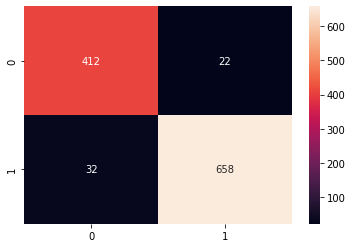

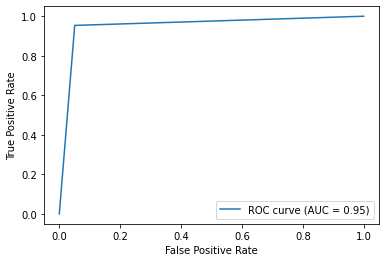

In [338]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_test, y_pred))
## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [339]:
y_submission = rf_model.predict(X_sample)

SVM

              precision    recall  f1-score   support

           0       0.54      0.76      0.63       434
           1       0.79      0.59      0.68       690

    accuracy                           0.65      1124
   macro avg       0.66      0.67      0.65      1124
weighted avg       0.69      0.65      0.66      1124

Model Accuracy: 0.6530249110320284


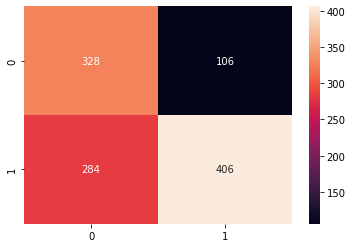

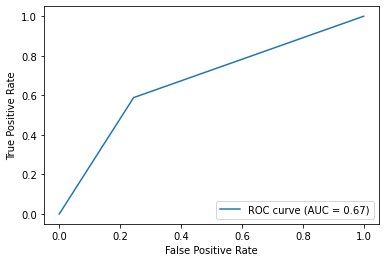

In [340]:
# (training)
svm_model = SVC()
svm_model.fit(X_train, y_train)

# evaluation
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model Accuracy:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

XBG

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       434
           1       0.97      0.95      0.96       690

    accuracy                           0.95      1124
   macro avg       0.94      0.95      0.95      1124
weighted avg       0.95      0.95      0.95      1124

Model Accuracy: 0.9483985765124555


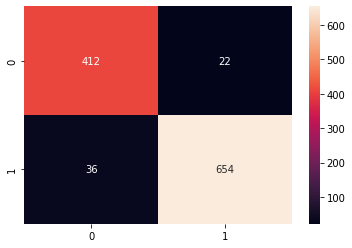

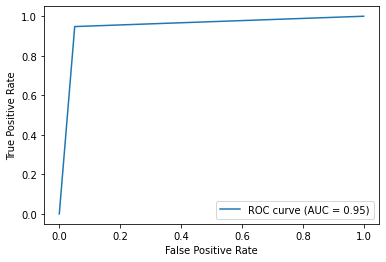

In [341]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model Accuracy:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Saving submission file


In [342]:
pred = pd.DataFrame(y_submission)
sub_df = pd.read_csv('https://raw.githubusercontent.com/bobby6007/airline_passenger_satissfaction/main/sample_submission.csv')
datasets = pd.concat([sub_df['id'],pred],axis=1)
datasets.columns=['id','satisfaction']
datasets.to_csv('final_submission.csv',index=False)